# Statistic

Sources and inspiration:


*   https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn#Penguin-Dataset:-Data-Visualization-with-Seaborn
*   https://seaborn.pydata.org/tutorial/categorical.html
* https://pandas.pydata.org/docs/user_guide/visualization.html
* https://levelup.gitconnected.com/statistics-on-seaborn-plots-with-statannotations-2bfce0394c00



needed packages:
 * pandas
 * numpy
 * scipy
 * scikit_posthocs

support package
 * seaborn
 * watermark (documenting version of packages)

In [1]:
#!pip install pandas
#!pip install scipy
#!pip install seaborn
!pip scikit_posthocs
!pip install watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


## Introduction

Many libraries are available in Python to clean, analyze, and plot data.
Python also has robust statistical packages which are used by thousands of other projects.*text kurzívou*

We will first setup the required tools, then describe the dataset we'll work on.

### Preparing the tools
First, let's prepare the tools we'll need, namely `pandas`, `numpy`, `scipy`. And `seaborn` package for its dataset penguins.

#### Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu, normaltest

Clean Penguins dataset

In [6]:
penguins = sns.load_dataset("penguins")
penguins_cleaned = penguins.dropna()

### Exploring the Data

We already prepared the penguin dataset with `penguins_cleaned = penguins.dropna()`, but we should double check.

In [7]:
penguins_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
penguins_cleaned.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [9]:
penguins_cleaned['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

From previous section we know that there are 3 species of penquins, which we can compare through some of the values available.

In [10]:
penguins_cleaned.pivot_table('bill_length_mm', index='sex', columns='species', aggfunc='mean')

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,37.257534,46.573529,45.563793
Male,40.390411,51.094118,49.473770


We can also prepare DataFrame per each penguin species.

In [24]:
Adelie_values =  penguins_cleaned[penguins_cleaned['species']=='Adelie']
Chinstrap_values = penguins_cleaned[penguins_cleaned['species']=='Chinstrap']
Gentoo_values = penguins_cleaned[penguins_cleaned['species']=='Gentoo']

#### Exercise
Try to split penguin species by using `groupby()` function.

In [22]:
# penguins_species = penguins_cleaned.groupby()

# penguins_species.get_group("Adelie")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


Lets explore values of each species.

In [25]:
Adelie_values.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,146.000000,146.000000,146.000000,146.000000
mean,38.823973,18.347260,190.102740,3706.164384
std,2.662597,1.219338,6.521825,458.620135
min,32.100000,15.500000,172.000000,2850.000000
25%,36.725000,17.500000,186.000000,3362.500000
50%,38.850000,18.400000,190.000000,3700.000000
75%,40.775000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [26]:
Chinstrap_values.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


In [27]:
Gentoo_values.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,119.000000,119.000000,119.000000,119.000000
mean,47.568067,14.996639,217.235294,5092.436975
std,3.106116,0.985998,6.585431,501.476154
min,40.900000,13.100000,203.000000,3950.000000
25%,45.350000,14.200000,212.000000,4700.000000
50%,47.400000,15.000000,216.000000,5050.000000
75%,49.600000,15.750000,221.500000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


Or, we can use `for` loop or `groupby()` to describe our data for each unique species value. It will help us to get some insight, even though we might later need `DataFrame` for each of the species.

In [28]:
for spec in penguins_cleaned['species'].unique():
  print(spec)
  print(penguins_cleaned[penguins_cleaned['species']==spec].describe())
  print('--------------')

Adelie
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      146.000000     146.000000         146.000000   146.000000
mean        38.823973      18.347260         190.102740  3706.164384
std          2.662597       1.219338           6.521825   458.620135
min         32.100000      15.500000         172.000000  2850.000000
25%         36.725000      17.500000         186.000000  3362.500000
50%         38.850000      18.400000         190.000000  3700.000000
75%         40.775000      19.000000         195.000000  4000.000000
max         46.000000      21.500000         210.000000  4775.000000
--------------
Chinstrap
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       68.000000      68.000000          68.000000    68.000000
mean        48.833824      18.420588         195.823529  3733.088235
std          3.339256       1.135395           7.131894   384.335081
min         40.900000      16.400000         178.000000  2700.000000
25

#### Test normality

`normaltest()` test whether a sample differs from a normal distribution.

This function tests the null hypothesis that a sample comes from a normal distribution.

The p-value range is between 0 and 1,

In [30]:
from scipy.stats import normaltest
print("Adelie: ", normaltest(Adelie_values['bill_length_mm']).pvalue)
print("Chinstrap: ", normaltest(Chinstrap_values['bill_length_mm']).pvalue)
print("Gentoo: ", normaltest(Gentoo_values['bill_length_mm']).pvalue)


Adelie:  0.7046667395852243
Chinstrap:  0.9143668075479967
Gentoo:  0.002785628232779262


Traditionally, in statistics, we need a p-value of less than 0.05 to
reject the null hypothesis.  In this case, the 2 out of 3 species have p-value > 0.05.  Because our p value is greater than 0.05, we cannot reject the null hypothesis.  Therefore, we have not proven that the 2 data sets are different from normality.

But what about the last?

Aren't we forgeting something? Do we know enough about the data?

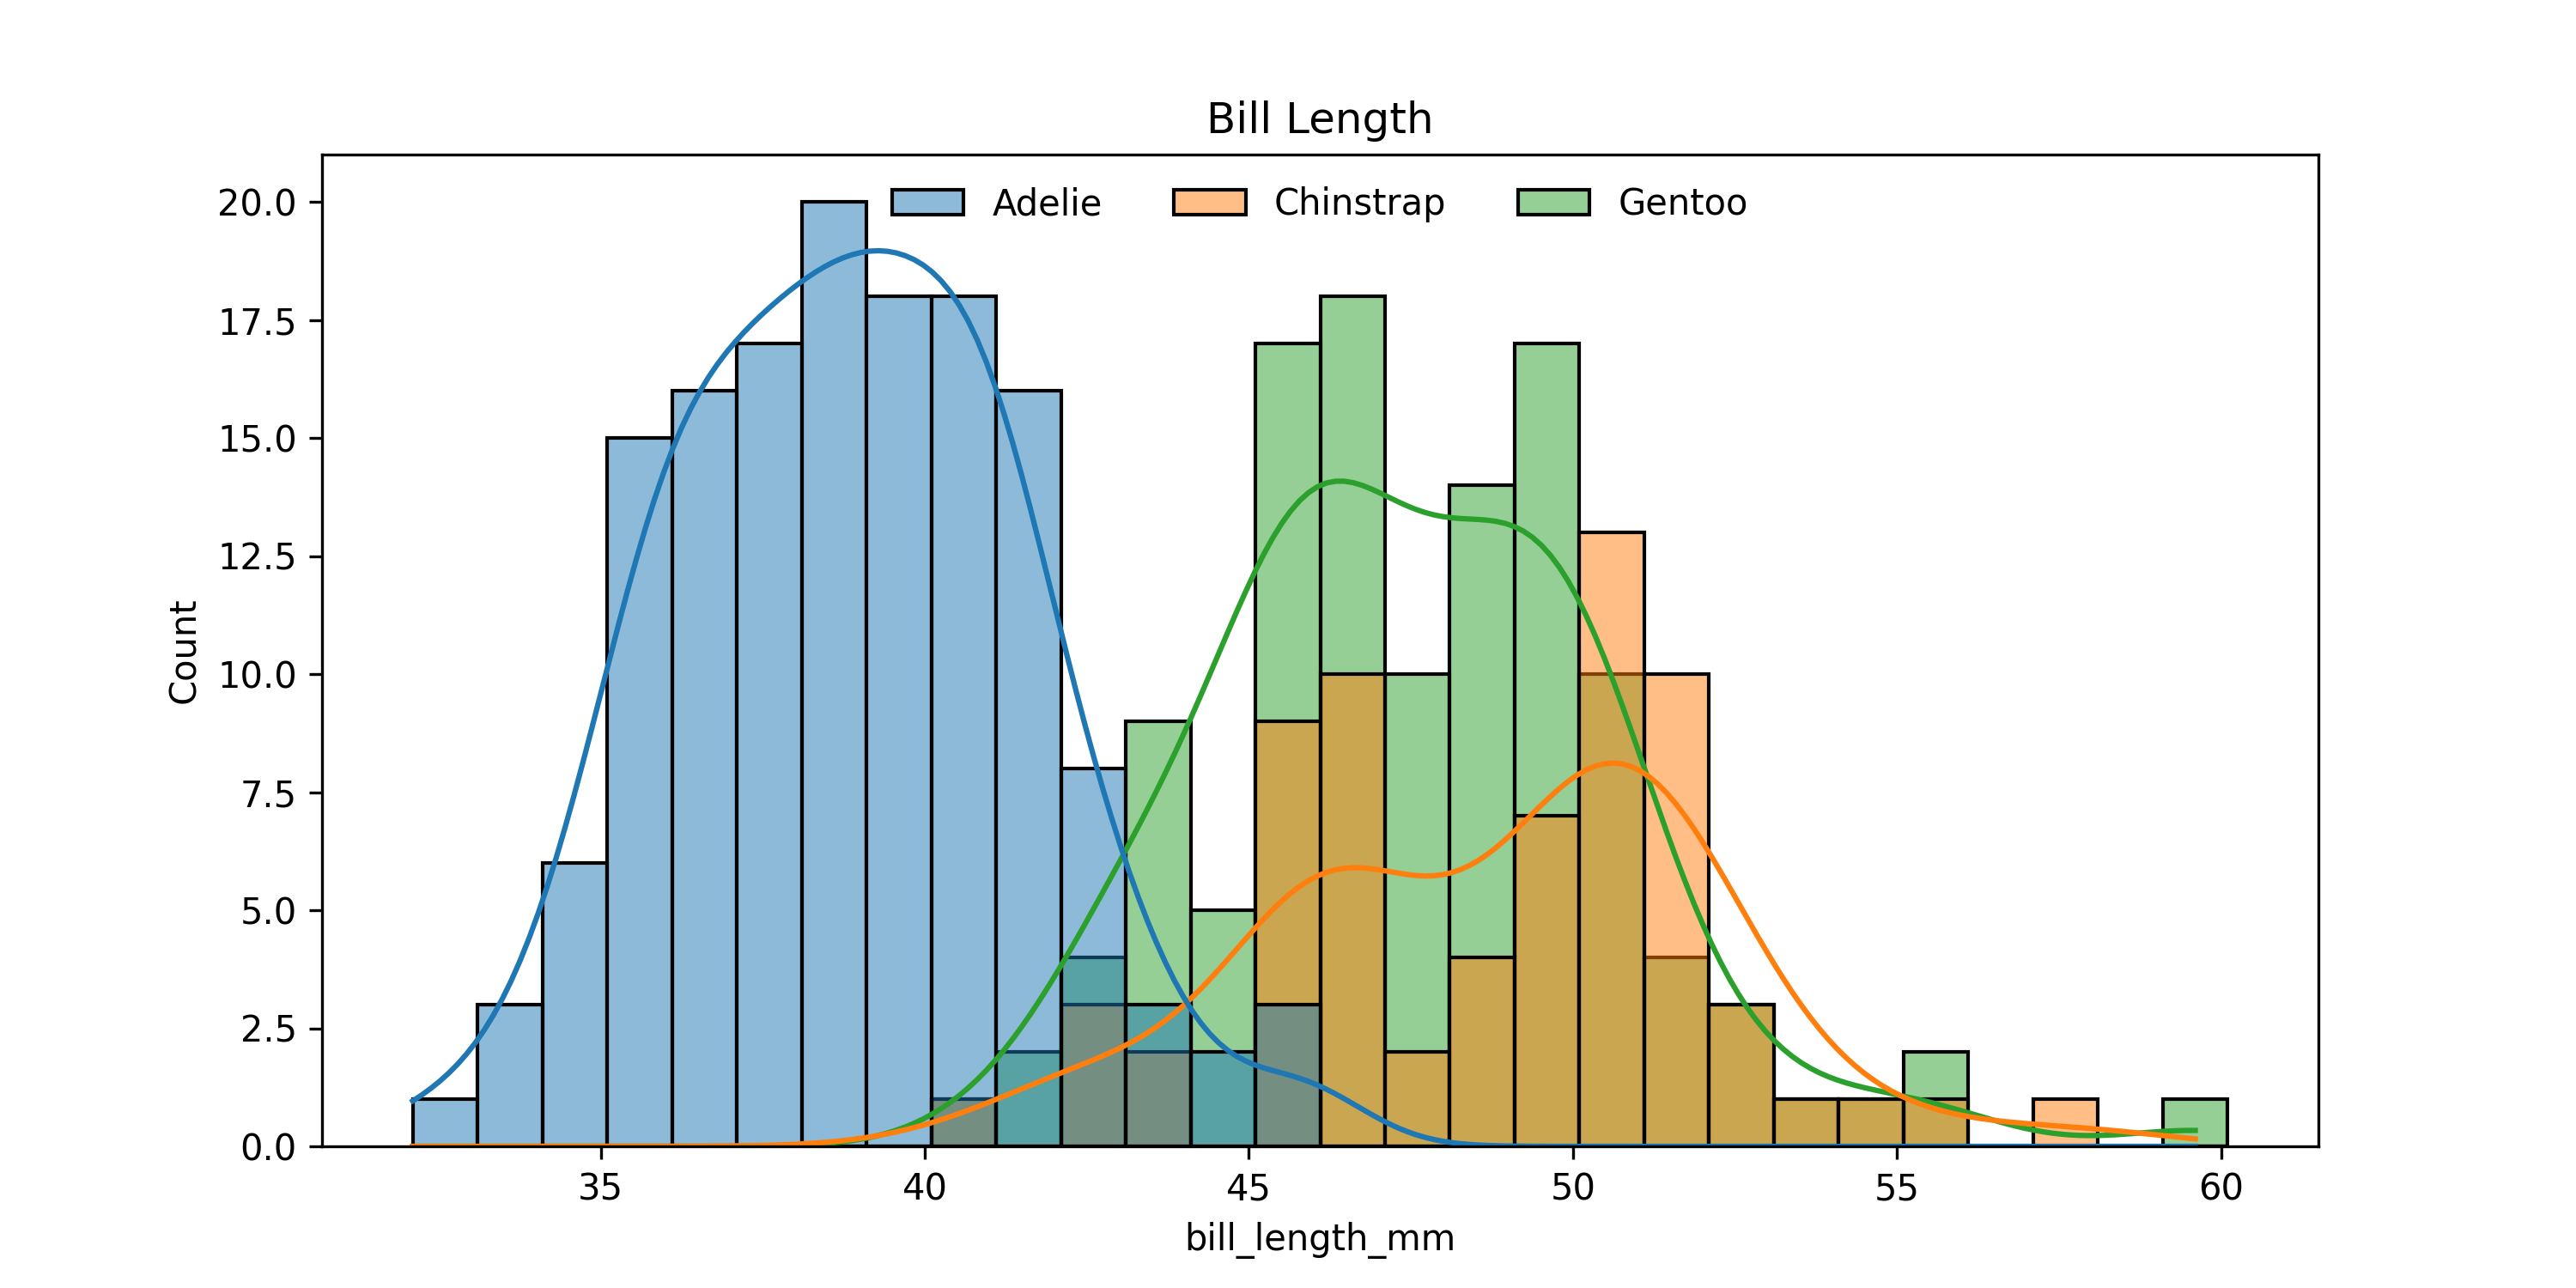

In [34]:
# import matplotlib.pyplot as plt
# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(10, 5))

# sns.histplot(x = "bill_length_mm", data = penguins_cleaned, binwidth=1, hue="species", kde=True)
# # plt.title("Bill Length", size=20, color="red") # would look wierd
# ax.set(title="Bill Length")

# sns.move_legend(
#     ax, "upper center",
#     bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
# )

# f.savefig('penguins_species_bill-length_PNG.png', dpi=300)

A normal distribution is symmetric about the mean.  
A normal distribution also has a specific width for a given height.

If you double the height, the width scales proportionally.  However,
you could imagine stretching a bell curve out in weird ways without
changing its symmetry.  You could have a sharp, pointy distribution,
or a fat, boxy one.

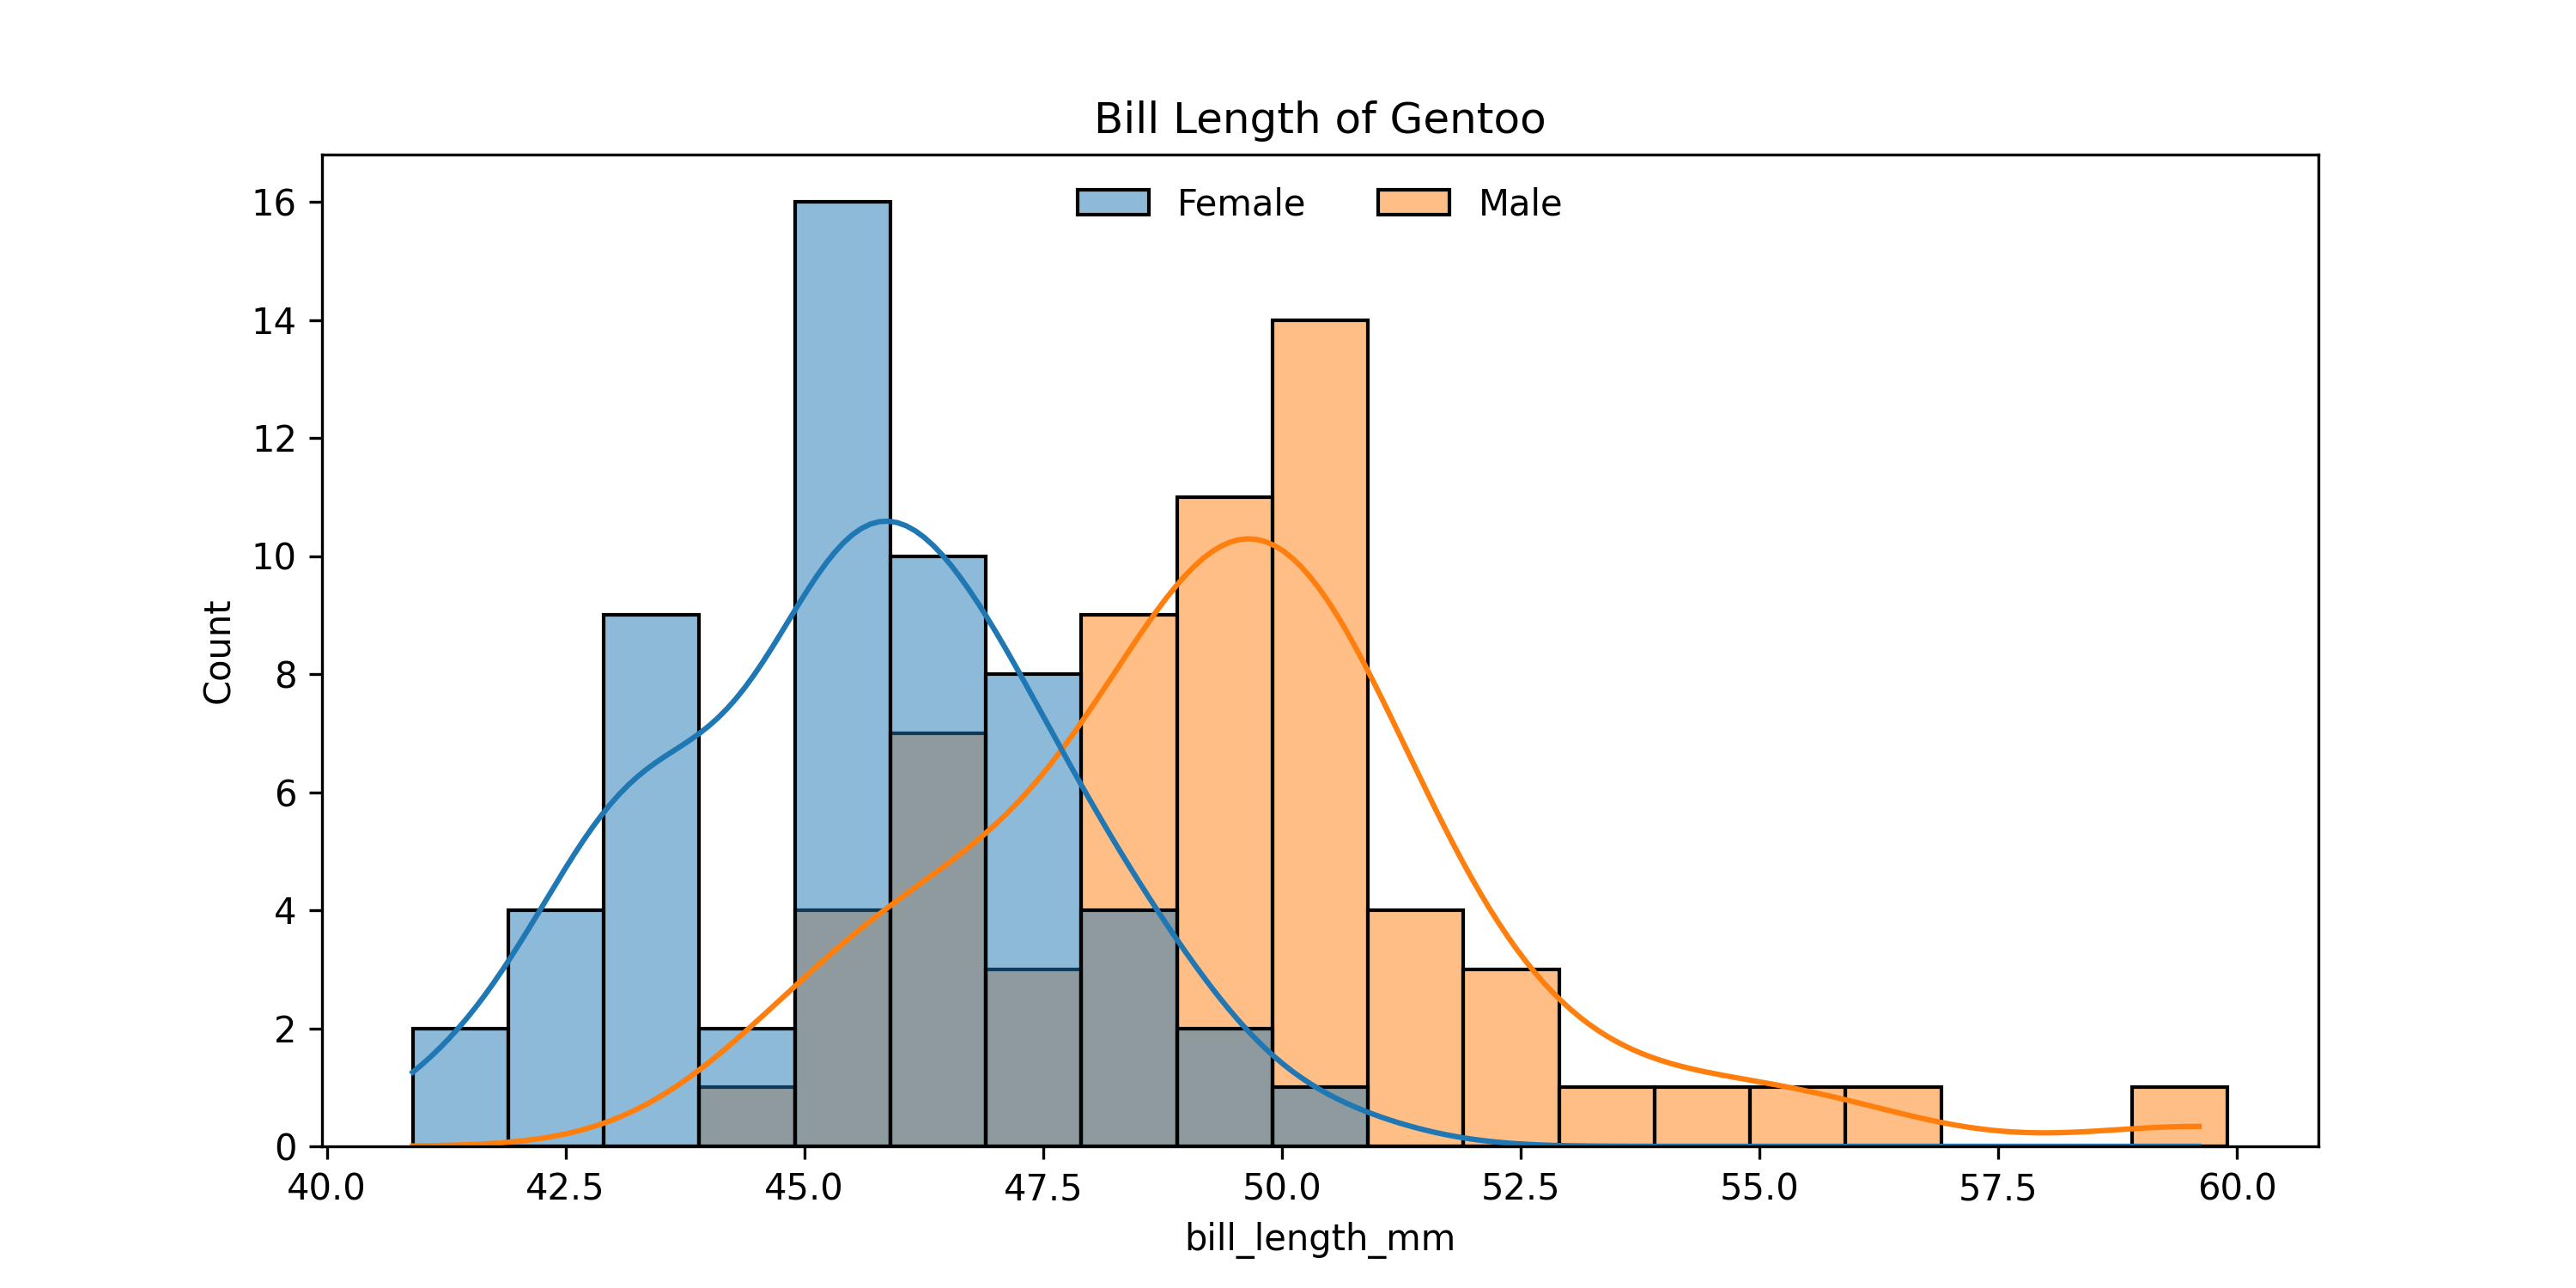

In [36]:
# import matplotlib.pyplot as plt

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(10, 5))

# sns.histplot(x = "bill_length_mm", data = Gentoo_values, binwidth=1, hue="sex", kde=True)
# # plt.title("Bill Length", size=20, color="red") # would look wierd
# ax.set(title="Bill Length of Gentoo")

# sns.move_legend(
#     ax, "upper center",
#     bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
# )

# f.savefig('penguins_gentoo_bill-length_PNG.png', dpi=300)

In [37]:
Gentoo_values_male=Gentoo_values[Gentoo_values.sex=='Male']
Gentoo_values_female=Gentoo_values[Gentoo_values.sex=='Female']

print("Gentoo male: ", normaltest(Gentoo_values_male['bill_length_mm']).pvalue)
print("Gentoo female: ", normaltest(Gentoo_values_female['bill_length_mm']).pvalue)

Gentoo male:  0.0005453287292381343
Gentoo female:  0.9029679515828937


## Applying Statistics tests

Luckily we are able to test and compare sets of values, even if they do not come from Normal Distribution

#### Parametric

`ttest_ind()` calculates the T-test for the means of two independent samples of scores.

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

There is a catch! We need to have either same number of samples, or same variance. `ttest_ind()` can perform a standard independent 2 sample test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variance.

---
**Note**
*Using Student's original definition of the t-test, the two populations being compared should have the same variance. If the sample sizes in the two groups being compared are equal, Student's original t-test is highly robust to the presence of unequal variances. Welch's t-test is insensitive to equality of the variances regardless of whether the sample sizes are similar.*

Perform Levene test for equal variances.

The Levene test tests the null hypothesis that all input samples are from populations with equal variances.

In [38]:
from scipy.stats import ttest_ind, levene

In [39]:
# pvalues with scipy:
stat_results = [levene(Adelie_values['bill_length_mm'], Chinstrap_values['bill_length_mm'])]

print("Adelie vs Chinstrap, variance: ", stat_results[0])

pvalues = [result.pvalue for result in stat_results]

Adelie vs Chinstrap, variance:  LeveneResult(statistic=4.529733833453024, pvalue=0.03446512682844295)


With p-value < 0.05 , we reject the null hypothesis that all input samples are from populations with equal variances. So we need Welch’s t-test

---
Null hypothesis is that 2 independent samples have identical average (expected) values.

In [40]:
# pvalues with scipy:
stat_results_ACh = [ttest_ind(Adelie_values['bill_length_mm'], Chinstrap_values['bill_length_mm'], equal_var=False)]

print("Adelie vs Chinstrap, mean: ", stat_results_ACh[0])

pvalues = [result.pvalue for result in stat_results_ACh]

Adelie vs Chinstrap, mean:  Ttest_indResult(statistic=-21.712498056635937, pvalue=3.1490764303457434e-41)


With p-value < 0.05 , we reject the null hypothesis. Now how we can plot this?

#### Non-parametric

In [41]:
from scipy.stats import mannwhitneyu

# pvalues with scipy:
stat_results_GFM = [mannwhitneyu(Gentoo_values_male['bill_length_mm'], Gentoo_values_female['bill_length_mm'], alternative="two-sided"),]

print("Gentoo male vs Gentoo female, bill_length_mm: ", stat_results_GFM[0])

pvalues = [result.pvalue for result in stat_results_GFM]

Gentoo male vs Gentoo female, bill_length_mm:  MannwhitneyuResult(statistic=3125.5, pvalue=5.58594267834405e-13)


### Testing set of groups

#### ANOVA
Now we have three samples, so a t-test is actually not appropriate. If we state the 0-Hypothesis that there is no difference between samples, we should apply a one-way ANOVA.

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. ANOVA was developed by the statistician Ronald Fisher. ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. **In other words, the ANOVA is used to test the difference between two or more means.**

In [43]:
from scipy.stats import f_oneway

stat_results_f_oneway = f_oneway(Adelie_values['bill_length_mm'], Chinstrap_values['bill_length_mm'], Gentoo_values['bill_length_mm'])

In [45]:
stat_results_f_oneway

F_onewayResult(statistic=397.29943741282835, pvalue=1.3809842053150027e-88)

#### Kruskal–Wallis test
The Kruskal–Wallis test is a **non-parametric** method for testing whether samples originate from the same distribution. It is used for comparing two or more independent samples of equal or different sample sizes. It extends the Mann–Whitney U test, which is used for comparing only two groups.

In [46]:
from scipy.stats import kruskal

stat_results_kruskal = kruskal(Adelie_values['bill_length_mm'], Chinstrap_values['bill_length_mm'], Gentoo_values['bill_length_mm'])

In [47]:
stat_results_kruskal

KruskalResult(statistic=236.8992355590763, pvalue=3.6139705965512625e-52)

We are looking at all comparisons at the same time. But we usually want to know which one makes the difference! **But here we need to include Multiple testing correction!**

#### Multiple testing correction
For ANOVA there is Tukey. For non-parametric tests, there is Dunn’s test.

**Tukey**

 This test uses pairwise post-hoc testing for **ANOVA** to determine whether there is a difference between the mean of all possible pairs using a studentized range distribution. This method tests every possible pair of all groups.

In [71]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# For Tukey the dataframe needs to be melted

data = penguins_cleaned[['species','bill_length_mm']]

In [60]:
# perform multiple pairwise comparison (Tukey HSD)
stat_results_pairwise_tukeyhsd = pairwise_tukeyhsd(endog=data['bill_length_mm'], groups=data['species'], alpha=0.05)

In [62]:
print(stat_results_pairwise_tukeyhsd)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Adelie Chinstrap  10.0099    0.0  8.9828 11.0369   True
   Adelie    Gentoo   8.7441    0.0  7.8801  9.6081   True
Chinstrap    Gentoo  -1.2658 0.0148 -2.3292 -0.2023   True
----------------------------------------------------------


**Dunn's test**

If the results of a **Kruskal-Wallis** test are statistically significant, then it’s appropriate to conduct Dunn’s Test to determine exactly which groups are different.

In [66]:
!pip install scikit_posthocs

In [68]:
data=[Adelie_values['bill_length_mm'].to_numpy(), Chinstrap_values['bill_length_mm'].to_numpy(), Gentoo_values['bill_length_mm'].to_numpy()]

In [74]:
#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni', group_col='species', val_col='bill_length_mm')

,Adelie,Chinstrap,Gentoo
Adelie,1.000000e+00,4.623888e-36,1.030275e-37
Chinstrap,4.623888e-36,1.000000e+00,2.697766e-01
Gentoo,1.030275e-37,2.697766e-01,1.000000e+00


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Adelie'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Chinstrap'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Gentoo'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Adelie'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Chinstrap'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Gentoo'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['Adelie', 'Chinstrap'], ['Chinstrap', 'Gentoo']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['Gentoo', 'Adelie', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Gentoo', 'Chinstrap', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Gentoo', 'count()', None], **{})
chart

---
# (Bonus preview) Use statannotations to apply scipy test

Finally, `statannotations` can take care of most of the steps required to run the test by calling `scipy.stats` directly
and annotate the plot.
The available options are

- Mann-Whitney
- t-test (independent and paired)
- Welch's t-test
- Levene test
- Wilcoxon test
- Kruskal-Wallis test

We will cover how to use a test that is not one of those already interfaced in `statannotations`.
If you are curious, you can also take a look at the usage
[notebook](https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb) in the project repository.

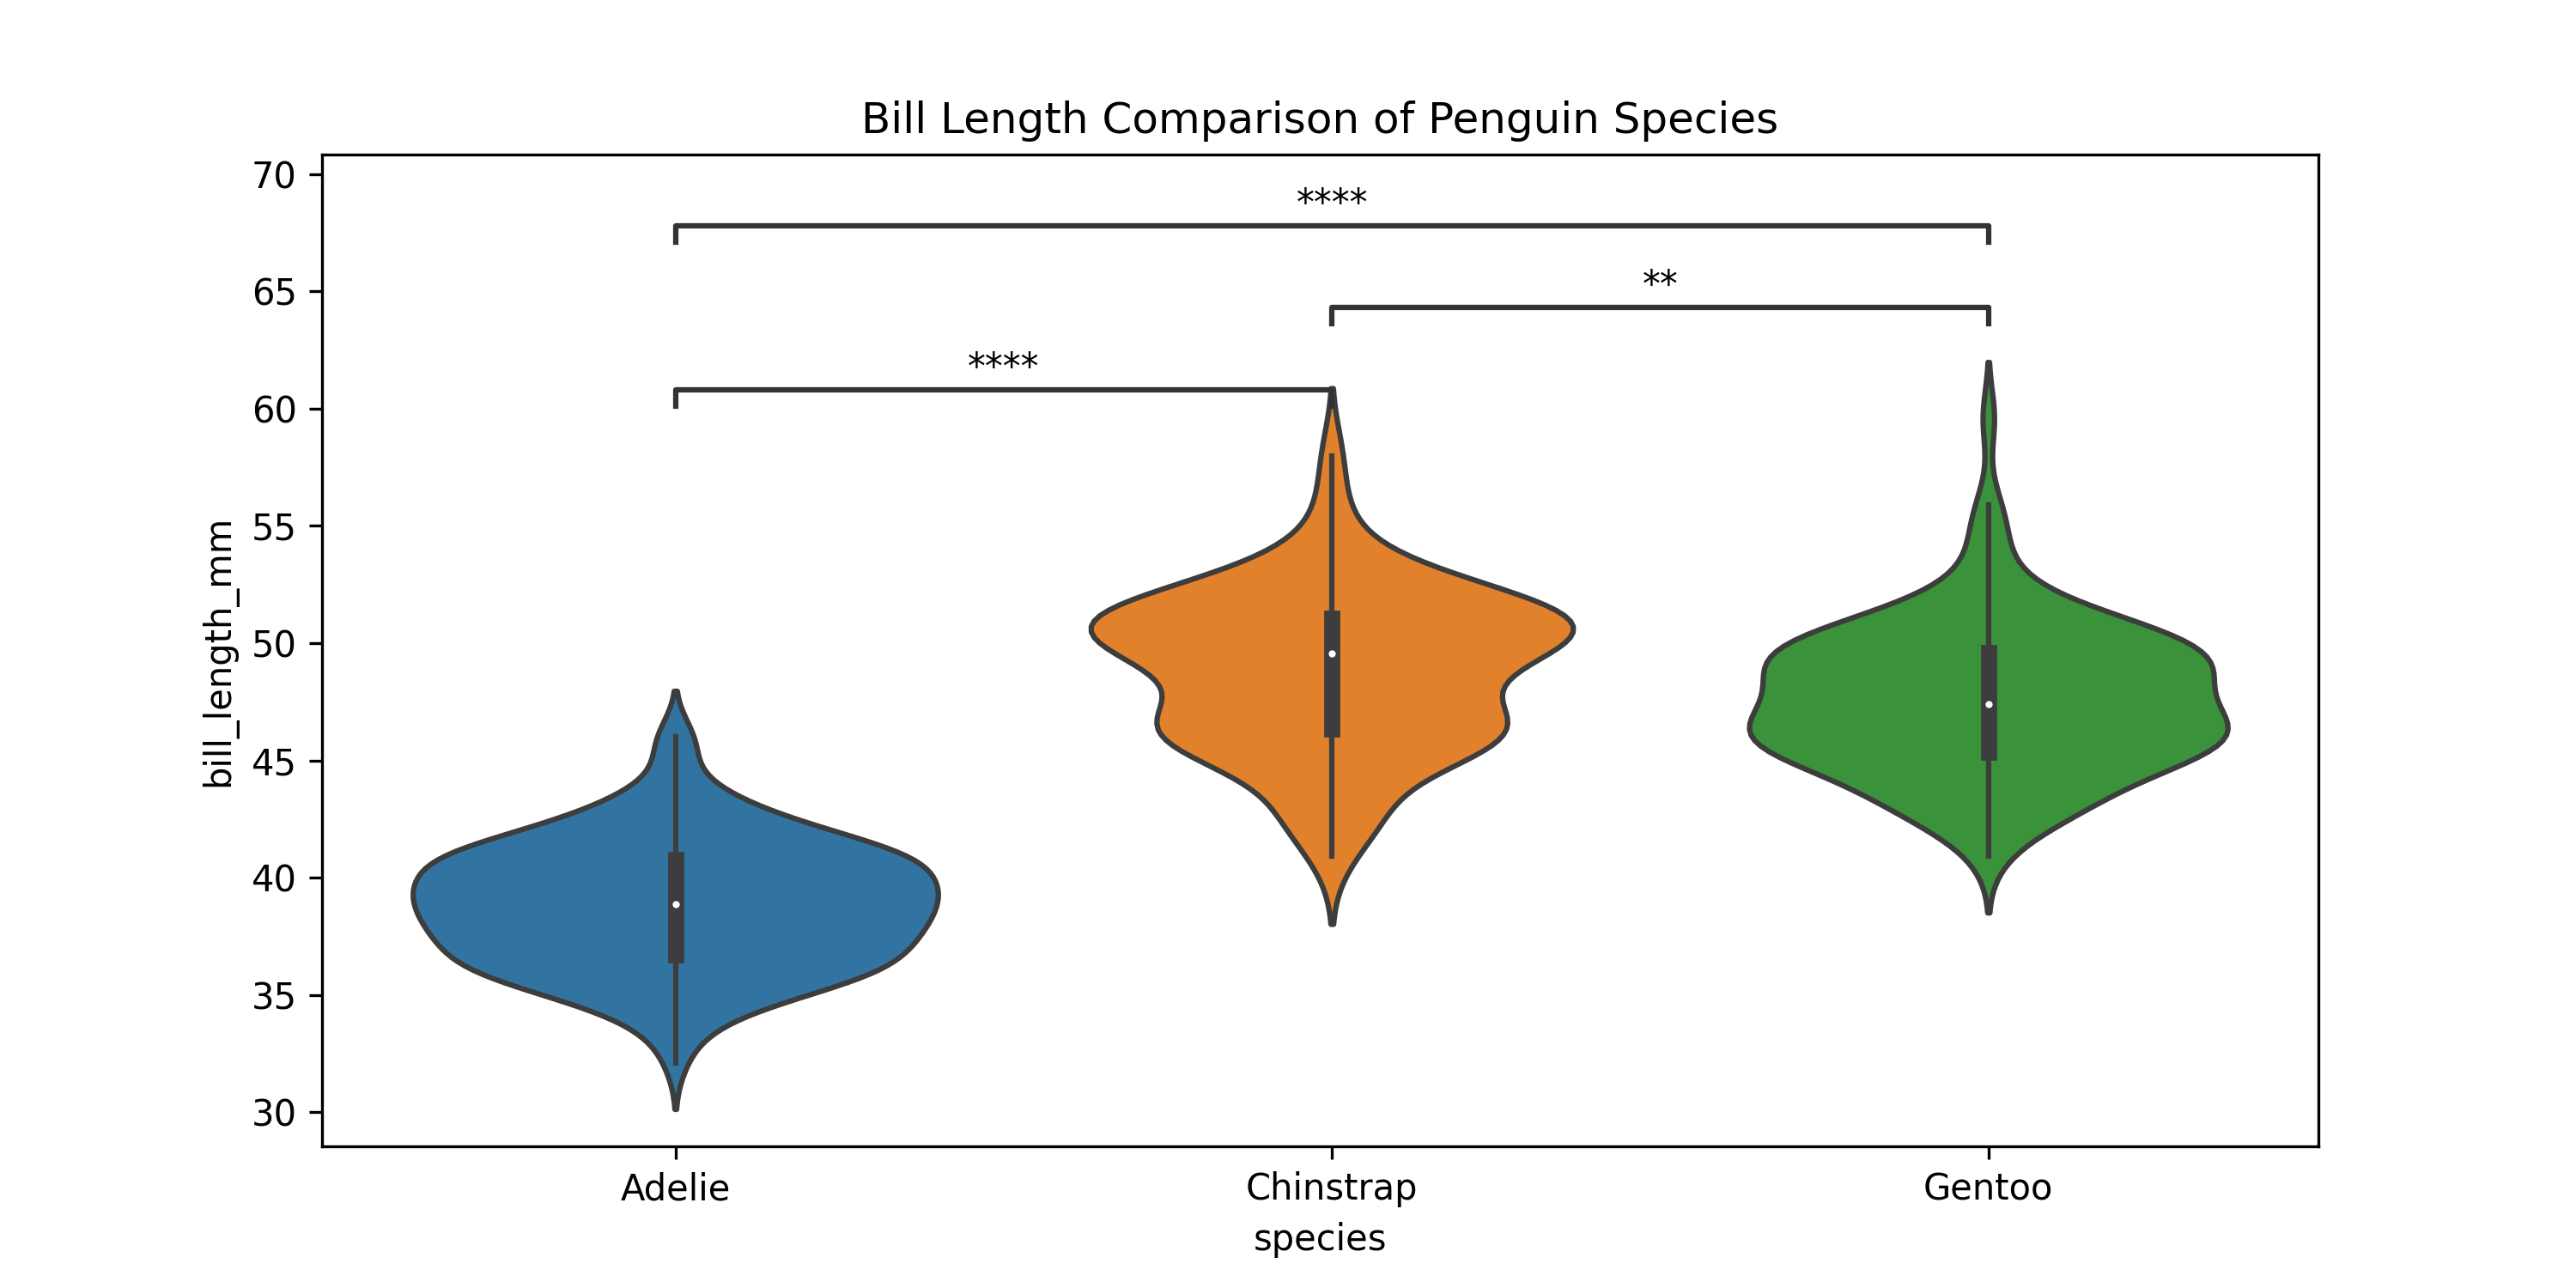

---

In [ ]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,seaborn,matplotlib,scipy,statannotations"))

Last updated: 2023-08-08T16:31:59.573995+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.109+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

watermark      : 2.4.3
numpy          : 1.22.4
pandas         : 1.5.3
seaborn        : 0.11.2
matplotlib     : 3.7.1
scipy          : 1.10.1
statannotations: 0.5.0

